# Zadaća 4

## Zadatak br. 1 - Twitter Sentiment
Cilj je razviti model mašinskog učenja koji može predviđati sentiment na Twitteru koristeći dostupne skupove podataka za treniranje i testiranje.

### Uvoz biblioteka

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

### Učitavanje podataka za treniranje i validaciju


In [26]:
train_data = pd.read_csv("podaci/Train.csv", names=['textID', 'text', 'selected_text', 'sentiment'], encoding='latin1')

### Provjeri osnovnih nekoliko redova podataka

In [27]:
print(train_data.head())

       textID                                            text  \
0      textID                                            text   
1  cb774db0d1             I`d have responded, if I were going   
2  549e992a42   Sooo SAD I will miss you here in San Diego!!!   
3  088c60f138                       my boss is bullying me...   
4  9642c003ef                  what interview! leave me alone   

                         selected_text  sentiment  
0                        selected_text  sentiment  
1  I`d have responded, if I were going    neutral  
2                             Sooo SAD   negative  
3                          bullying me   negative  
4                       leave me alone   negative  


### Provjera osnovnih informacija o podacima

In [28]:
print(train_data.info())
print(train_data['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27482 entries, 0 to 27481
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27482 non-null  object
 1   text           27481 non-null  object
 2   selected_text  27481 non-null  object
 3   sentiment      27482 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None
sentiment
neutral      11118
positive      8582
negative      7781
sentiment        1
Name: count, dtype: int64


### Prikazivanje raspodjele sentimenata

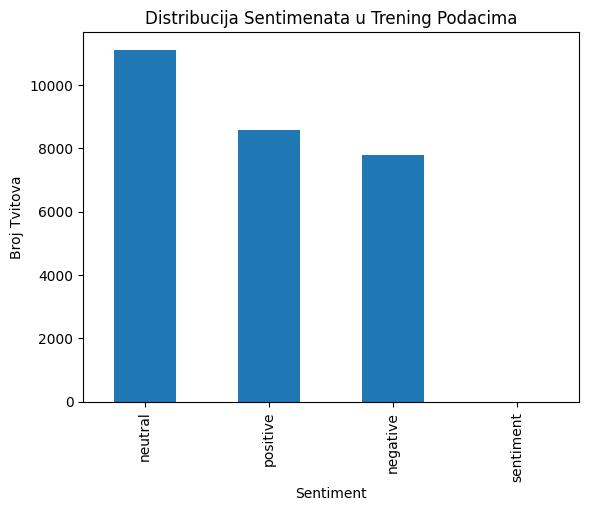

In [29]:
train_data['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribucija Sentimenata u Trening Podacima')
plt.xlabel('Sentiment')
plt.ylabel('Broj Tvitova')
plt.show()

### Uklanjanje svih redova sa null vrijednostima

In [30]:
train_data = train_data.dropna(subset=['text', 'sentiment'])

### Razdvajanje podataka na trening i test skupove

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_data['text'], train_data['sentiment'], test_size=0.2, random_state=42)

### Vektorizacija: Koristi TF-IDF za pretvaranje teksta u numerički oblik

In [32]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Kreiranje i treniranje Naive Bayes modela

In [33]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

### Predviđanje i evaluacija Naive Bayes modela

In [34]:
y_pred_nb = nb_model.predict(X_test_tfidf)
print(f"Tačnost modela Naivnog Bayesa: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))

Tačnost modela Naivnog Bayesa: 0.6368928506458068
              precision    recall  f1-score   support

    negative       0.76      0.46      0.57      1562
     neutral       0.55      0.79      0.65      2235
    positive       0.75      0.59      0.66      1700

    accuracy                           0.64      5497
   macro avg       0.69      0.62      0.63      5497
weighted avg       0.67      0.64      0.63      5497



### Kreiranje i treniranje Logistic Regression modela

In [35]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

### Predviđanje i evaluacija Logistic Regression modela

In [36]:
y_pred_lr = lr_model.predict(X_test_tfidf)
print(f"Tačnost Logistic Regression modela: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

Tačnost Logistic Regression modela: 0.6961979261415318
              precision    recall  f1-score   support

    negative       0.73      0.61      0.67      1562
     neutral       0.63      0.75      0.69      2235
    positive       0.78      0.70      0.74      1700

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



### Spremanje Naive Bayes modela i vektorizatora

In [37]:
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

### Predviđanje za nove tweetove

In [38]:
new_tweets = ["I love this product!", "This is the worst thing I've ever bought!"]
new_tweets_tfidf = vectorizer.transform(new_tweets)
new_predictions = nb_model.predict(new_tweets_tfidf)

print("Predviđanja za nove tweetove:", new_predictions)

Predviđanja za nove tweetove: ['positive' 'negative']
